In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os
from PIL import Image
print(os.listdir("./common/data"))

import tensorflow as tf
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

['chest_xray', 'resampled', 'TEST']


Using TensorFlow backend.


# Load Data

In [2]:
train_folder= './common/data/chest_xray/train/'
val_folder = './common/data/chest_xray/val/'
test_folder = './common/data/chest_xray/test/'

Set up Training Folders

In [3]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'PNEUMONIA/'

Set up Testing Folders

In [4]:
# test
os.listdir(test_folder)
train_n = test_folder+'NORMAL/'
train_p = test_folder+'PNEUMONIA/'

234
normal picture title:  NORMAL2-IM-0201-0001.jpeg
pneumonia picture title: person140_bacteria_668.jpeg


Text(0.5, 1.0, 'Pneumonia')

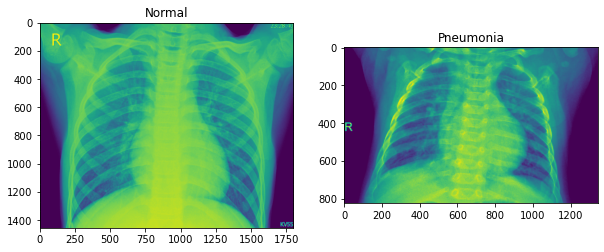

In [5]:
#Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Pneumonia
rand_p = np.random.randint(0,len(os.listdir(train_p)))

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('pneumonia picture title:', sic_pic)

# Load images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

# plot images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Pneumonia')

# Generate Dataset from image data

In [6]:
from common.src import util

train_datagen = util.create_train_datagen()
test_datagen = util.create_test_datagen()

training_set = util.create_generator_set(train_datagen, './common/data/chest_xray/train/')
validation_generator = util.create_generator_set(test_datagen, './common/data/chest_xray/val/')
test_set = util.create_generator_set(test_datagen, './common/data/chest_xray/test/') 

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# Create Model

In [7]:
from common.src import models

cnn = models.CNNModel()
cnn.create_model()
cnn.summary()

# Fit Model

In [8]:
cnn_model = cnn.fit_generator(training_set, validation_generator, epochs = 20)

Epoch 1/20
163/163 [==============================] - 232s 1s/step - loss: 0.3709 - tp: 4329.0000 - fp: 825.0000 - tn: 4391.0000 - fn: 887.0000 - accuracy: 0.8359 - precision: 0.8399 - recall: 0.8299 - auc: 0.9146 - val_loss: 0.3308 - val_tp: 8736.0000 - val_fp: 1248.0000 - val_tn: 8736.0000 - val_fn: 1248.0000 - val_accuracy: 0.8750 - val_precision: 0.8750 - val_recall: 0.8750 - val_auc: 0.9570
Epoch 2/20
163/163 [==============================] - 284s 2s/step - loss: 0.2264 - tp: 4765.0000 - fp: 457.0000 - tn: 4759.0000 - fn: 451.0000 - accuracy: 0.9130 - precision: 0.9125 - recall: 0.9135 - auc: 0.9685 - val_loss: 0.5609 - val_tp: 6240.0000 - val_fp: 3744.0000 - val_tn: 6240.0000 - val_fn: 3744.0000 - val_accuracy: 0.6250 - val_precision: 0.6250 - val_recall: 0.6250 - val_auc: 0.8320
Epoch 3/20
163/163 [==============================] - 313s 2s/step - loss: 0.2181 - tp: 4736.0000 - fp: 475.0000 - tn: 4741.0000 - fn: 480.0000 - accuracy: 0.9085 - precision: 0.9088 - recall: 0.9080 - 

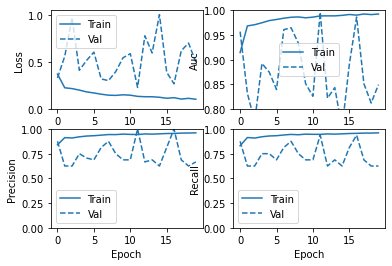

In [9]:
cnn.plot_history()

In [10]:
print(cnn.get_classification_report(test_set))

              precision    recall  f1-score   support

      NORMAL       0.42      0.35      0.38       234
   PNEUMONIA       0.65      0.72      0.68       390

    accuracy                           0.58       624
   macro avg       0.53      0.53      0.53       624
weighted avg       0.56      0.58      0.57       624

None


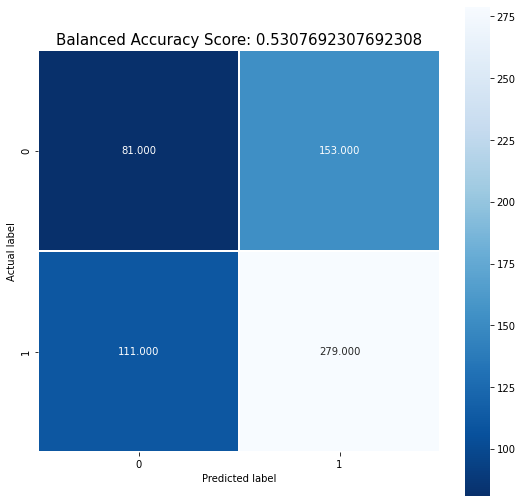

In [11]:
cnn.display_confusion_matrix(test_data_generator = test_set)